<a href="https://colab.research.google.com/github/cruz-marco/dex_files/blob/main/hackaton_2_manipulacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet, ElasticNetCV, HuberRegressor, LassoLars, BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

% matplotlib inline

In [ ]:
df_feat = pd.read_csv('/content/drive/MyDrive/Datasets/hackaton2/features.csv')

df_feat.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df_size = pd.read_csv('/content/drive/MyDrive/Datasets/hackaton2/stores.csv')
df_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
df_wksales = pd.read_csv('/content/drive/MyDrive/Datasets/hackaton2/train.csv')
df_wksales.head()

df_wksales_gp = df_wksales.groupby(['Store', 'Date']).agg('sum')

df_wksales_gp = df_wksales_gp.reset_index().drop(['Dept', 'IsHoliday'], axis =1)

In [ ]:
df_feat = df_feat.merge(df_size, how='left', on='Store')

In [ ]:
df_mgd = df_feat.merge(df_wksales_gp, how='left', on=['Store', 'Date'])

df_mgd

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1643690.90
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,1641957.44
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,1611968.17
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,1409727.59
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,NaN
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,NaN
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,NaN
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,NaN


In [ ]:
cat_info = list()
for cat in df_mgd[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].columns:
    cat_info.append({
        'Variavel': cat,
        'Qtd': len(df_mgd[cat].unique()),
        'Percent': df_mgd[cat].isna().sum()/len(df_mgd),
        'Cats': tuple(df_mgd[cat].unique())[:15]
        
    })

print(*sorted(cat_info, key=lambda x: x['Qtd'], reverse=True), sep='\n')

{'Variavel': 'MarkDown5', 'Qtd': 4046, 'Percent': 0.5054945054945055, 'Cats': (nan, 6551.42, 5988.57, 554.92, 20475.32, 14461.82, 4011.37, 2739.43, 4735.78, 8483.0, 3719.38, 3400.21, 1222.19, 5630.4, 6886.04)}
{'Variavel': 'MarkDown1', 'Qtd': 4024, 'Percent': 0.5076923076923077, 'Cats': (nan, 10382.9, 6074.12, 410.31, 5629.51, 4640.65, 5011.32, 2725.36, 5762.1, 6277.39, 5183.29, 4139.87, 1164.46, 34577.06, 13925.06)}
{'Variavel': 'MarkDown4', 'Qtd': 3406, 'Percent': 0.577045177045177, 'Cats': (nan, 2406.62, 427.39, 8.0, 2084.64, 3639.42, 225.79, 24.9, 983.65, 1450.13, 453.08, 500.62, 11.0, 32403.87, 8471.88)}
{'Variavel': 'MarkDown3', 'Qtd': 2886, 'Percent': 0.5588522588522589, 'Cats': (nan, 215.07, 51.98, 55805.51, 1398.11, 105.02, 347.37, 634.7, 260.36, 143.1, 42.24, 33.88, 44.0, 160.53, 101.64)}
{'Variavel': 'MarkDown2', 'Qtd': 2716, 'Percent': 0.6433455433455434, 'Cats': (nan, 6115.67, 254.39, 98.0, 68.0, 19.0, 67.0, 40.48, 46011.38, 21813.16, 8025.87, 2807.19, 1082.74, 3579.21, 69

In [ ]:
columns = ['MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5']

for col in columns: 
  df_mgd.loc[df_feat[col].isnull(), col] = 0

df_mgd

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,A,151315,1643690.90
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,A,151315,1641957.44
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,A,151315,1611968.17
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,A,151315,1409727.59
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,A,151315,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,NaN
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,NaN
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,NaN
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,NaN


In [ ]:
df_mgd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
 14  Weekly_Sales  6435 non-null   float64
dtypes: bool(1), float64(10), int64(2), object(2)
memory usage: 967.8+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


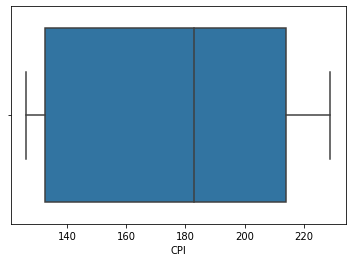

In [ ]:
sns.boxplot(df_mgd['CPI'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


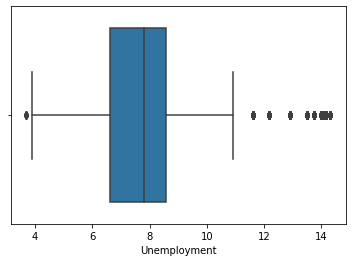

In [ ]:
sns.boxplot(df_mgd['Unemployment'])

In [ ]:
df_mgd.loc[df_feat['CPI'].isnull(),'CPI'] = df_mgd['CPI'].mean()
df_mgd.loc[df_feat['Unemployment'].isnull(), 'Unemployment'] = df_mgd['Unemployment'].median()

In [ ]:
df_mgd

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,A,151315,1643690.90
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,A,151315,1641957.44
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,A,151315,1611968.17
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,A,151315,1409727.59
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,A,151315,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,172.460809,7.806,False,B,118221,NaN
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,172.460809,7.806,False,B,118221,NaN
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,172.460809,7.806,False,B,118221,NaN
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,172.460809,7.806,False,B,118221,NaN


In [ ]:
df_mgd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
 14  Weekly_Sales  6435 non-null   float64
dtypes: bool(1), float64(10), int64(2), object(2)
memory usage: 967.8+ KB


In [ ]:
df_mg_nona = df_mgd.dropna()

In [ ]:
df_mg_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 8150
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Temperature   6435 non-null   float64
 3   Fuel_Price    6435 non-null   float64
 4   MarkDown1     6435 non-null   float64
 5   MarkDown2     6435 non-null   float64
 6   MarkDown3     6435 non-null   float64
 7   MarkDown4     6435 non-null   float64
 8   MarkDown5     6435 non-null   float64
 9   CPI           6435 non-null   float64
 10  Unemployment  6435 non-null   float64
 11  IsHoliday     6435 non-null   bool   
 12  Type          6435 non-null   object 
 13  Size          6435 non-null   int64  
 14  Weekly_Sales  6435 non-null   float64
dtypes: bool(1), float64(10), int64(2), object(2)
memory usage: 760.4+ KB


In [ ]:
df_mg_nona = df_mg_nona.astype({'IsHoliday': float})

In [ ]:
df_mg_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 8150
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Temperature   6435 non-null   float64
 3   Fuel_Price    6435 non-null   float64
 4   MarkDown1     6435 non-null   float64
 5   MarkDown2     6435 non-null   float64
 6   MarkDown3     6435 non-null   float64
 7   MarkDown4     6435 non-null   float64
 8   MarkDown5     6435 non-null   float64
 9   CPI           6435 non-null   float64
 10  Unemployment  6435 non-null   float64
 11  IsHoliday     6435 non-null   float64
 12  Type          6435 non-null   object 
 13  Size          6435 non-null   int64  
 14  Weekly_Sales  6435 non-null   float64
dtypes: float64(11), int64(2), object(2)
memory usage: 804.4+ KB


In [ ]:
df_mg_nona = df_mg_nona.astype({
    'Store': 'category',
    'Type': 'category'

})

In [ ]:
df_mg_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 8150
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Store         6435 non-null   category
 1   Date          6435 non-null   object  
 2   Temperature   6435 non-null   float64 
 3   Fuel_Price    6435 non-null   float64 
 4   MarkDown1     6435 non-null   float64 
 5   MarkDown2     6435 non-null   float64 
 6   MarkDown3     6435 non-null   float64 
 7   MarkDown4     6435 non-null   float64 
 8   MarkDown5     6435 non-null   float64 
 9   CPI           6435 non-null   float64 
 10  Unemployment  6435 non-null   float64 
 11  IsHoliday     6435 non-null   float64 
 12  Type          6435 non-null   category
 13  Size          6435 non-null   int64   
 14  Weekly_Sales  6435 non-null   float64 
dtypes: category(2), float64(11), int64(1), object(1)
memory usage: 717.9+ KB


In [ ]:
dfCat = pd.DataFrame()

In [ ]:
df_mg_nona.drop(['Date', 'Type'], axis=1, inplace=True)

In [ ]:
dfCat = pd.get_dummies(df_mg_nona['Store'], prefix='store_')

In [ ]:
dfCat

,store__1,store__2,store__3,store__4,store__5,store__6,store__7,store__8,store__9,store__10,...,store__36,store__37,store__38,store__39,store__40,store__41,store__42,store__43,store__44,store__45
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
num_columns = 'Temperature Fuel_Price	MarkDown1	MarkDown2	MarkDown3	MarkDown4	MarkDown5	CPI	Unemployment Size'.split()

scaler = StandardScaler()

In [ ]:
dfNum = pd.DataFrame(scaler.fit_transform(df_mg_nona[num_columns]), columns=num_columns)

dfNum

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
0,-0.995136,-1.713800,-0.413730,-0.167840,-0.081391,-0.268770,-0.386006,1.004175,0.056964,0.333175
1,-1.201170,-1.766089,-0.413730,-0.167840,-0.081391,-0.268770,-0.386006,1.007880,0.056964,0.333175
2,-1.124178,-1.840166,-0.413730,-0.167840,-0.081391,-0.268770,-0.386006,1.009074,0.056964,0.333175
3,-0.760907,-1.737766,-0.413730,-0.167840,-0.081391,-0.268770,-0.386006,1.009849,0.056964,0.333175
4,-0.767955,-1.598328,-0.413730,-0.167840,-0.081391,-0.268770,-0.386006,1.010624,0.056964,0.333175
...,...,...,...,...,...,...,...,...,...,...
6430,0.228602,1.390883,0.362389,-0.163610,-0.081107,0.157750,0.416421,0.519270,0.365109,-0.191193
6431,0.229144,1.364738,0.445871,-0.167840,-0.077822,0.331560,0.185023,0.523256,0.356046,-0.191193
6432,-0.335825,1.397419,-0.080521,-0.167840,-0.079895,-0.109107,0.587800,0.527241,0.356046,-0.191193
6433,-0.227385,1.329879,-0.072389,-0.167840,-0.080788,-0.152156,-0.010815,0.527332,0.356046,-0.191193


In [ ]:
dfFinal = pd.concat([dfCat.reset_index(drop=True), dfNum.reset_index(drop=True),
                     df_mg_nona[['IsHoliday', 'Weekly_Sales']].reset_index()], axis=1)

In [ ]:
df_mg_nona[['IsHoliday', 'Weekly_Sales']].reset_index()

,IsHoliday,Weekly_Sales
0,0.0,1643690.90
1,1.0,1641957.44
2,0.0,1611968.17
3,0.0,1409727.59
4,0.0,1554806.68
...,...,...
8146,0.0,713173.95
8147,0.0,733455.07
8148,0.0,734464.36
8149,0.0,718125.53


In [ ]:
dfFinal

,store__1,store__2,store__3,store__4,store__5,store__6,store__7,store__8,store__9,store__10,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,index,IsHoliday,Weekly_Sales
0,1,0,0,0,0,0,0,0,0,0,...,-0.167840,-0.081391,-0.268770,-0.386006,1.004175,0.056964,0.333175,0,0.0,1643690.90
1,1,0,0,0,0,0,0,0,0,0,...,-0.167840,-0.081391,-0.268770,-0.386006,1.007880,0.056964,0.333175,1,1.0,1641957.44
2,1,0,0,0,0,0,0,0,0,0,...,-0.167840,-0.081391,-0.268770,-0.386006,1.009074,0.056964,0.333175,2,0.0,1611968.17
3,1,0,0,0,0,0,0,0,0,0,...,-0.167840,-0.081391,-0.268770,-0.386006,1.009849,0.056964,0.333175,3,0.0,1409727.59
4,1,0,0,0,0,0,0,0,0,0,...,-0.167840,-0.081391,-0.268770,-0.386006,1.010624,0.056964,0.333175,4,0.0,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,0,0,0,0,0,0,0,0,0,0,...,-0.163610,-0.081107,0.157750,0.416421,0.519270,0.365109,-0.191193,8146,0.0,713173.95
6431,0,0,0,0,0,0,0,0,0,0,...,-0.167840,-0.077822,0.331560,0.185023,0.523256,0.356046,-0.191193,8147,0.0,733455.07
6432,0,0,0,0,0,0,0,0,0,0,...,-0.167840,-0.079895,-0.109107,0.587800,0.527241,0.356046,-0.191193,8148,0.0,734464.36
6433,0,0,0,0,0,0,0,0,0,0,...,-0.167840,-0.080788,-0.152156,-0.010815,0.527332,0.356046,-0.191193,8149,0.0,718125.53


In [ ]:
dfSpl = dfFinal.sample(1000, random_state = 12345)

In [ ]:
dfSpl

,store__1,store__2,store__3,store__4,store__5,store__6,store__7,store__8,store__9,store__10,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,index,IsHoliday,Weekly_Sales
1652,0,0,0,0,0,0,0,0,0,0,...,-0.167840,-0.081391,-0.268770,-0.386006,-1.076820,2.934230,-0.285993,2081,0.0,955913.68
1580,0,0,0,0,0,0,0,0,0,0,...,-0.167840,-0.081391,-0.268770,-0.386006,-1.142799,3.185864,-0.285993,2009,0.0,981615.81
6005,0,0,0,0,0,0,0,0,0,0,...,-0.167687,-0.081012,-0.268770,-0.133546,-1.026215,-0.563059,-1.435502,7604,0.0,514756.08
1768,0,0,0,0,0,0,0,0,0,0,...,-0.167840,-0.081391,-0.268770,-0.386006,-1.114479,-0.282103,1.415487,2236,0.0,1848186.58
3944,0,0,0,0,0,0,0,0,0,0,...,-0.167840,-0.081391,-0.268770,-0.386006,-1.072576,2.934230,1.204434,4997,1.0,1310087.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,0,0,0,0,0,0,0,0,0,0,...,-0.167840,-0.078040,0.249922,1.012180,-0.757418,-0.174945,-0.170024,3935,0.0,1197489.66
509,0,0,0,1,0,0,0,0,0,0,...,-0.167840,-0.081391,-0.268770,-0.386006,-1.075829,-1.255586,1.197478,626,0.0,2232892.10
1595,0,0,0,0,0,0,0,0,0,0,...,-0.167840,-0.081391,-0.268770,-0.386006,-1.154317,3.295154,-0.285993,2024,0.0,943506.28
3647,0,0,0,0,0,0,0,0,0,0,...,-0.167840,-0.081391,-0.268770,-0.386006,-0.922738,-0.096576,0.352157,4622,0.0,997474.93


In [ ]:
y = dfSpl['Weekly_Sales'][:]
X = dfSpl.drop('Weekly_Sales', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,store__1,store__2,store__3,store__4,store__5,store__6,store__7,store__8,store__9,store__10,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,index,IsHoliday
1931,0,0,0,0,0,0,0,0,0,0,...,-0.413730,-0.167840,-0.081391,-0.268770,-0.386006,0.361175,0.278210,1.118809,2438,0.0
282,0,1,0,0,0,0,0,0,0,0,...,0.614670,-0.167840,-0.079487,0.537743,0.554334,1.301977,-0.975163,1.141134,321,0.0
381,0,0,1,0,0,0,0,0,0,0,...,-0.268805,-0.163958,0.066853,-0.163729,1.394695,1.285282,-0.427645,-1.471914,459,0.0
3727,0,0,0,0,0,0,0,0,0,0,...,-0.413730,-0.167840,-0.081391,-0.268770,-0.386006,-0.909515,0.031374,1.170875,4741,0.0
1076,0,0,0,0,0,0,0,1,0,0,...,-0.413730,-0.167840,-0.081391,-0.268770,-0.386006,1.199285,-0.839216,0.392799,1349,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,0,0,0,0,0,0,0,0,0,0,...,0.204188,3.651099,-0.060819,-0.042937,0.495923,1.045907,-0.553462,1.163872,3559,0.0
33,1,0,0,0,0,0,0,0,0,0,...,-0.413730,-0.167840,-0.081391,-0.268770,-0.386006,1.016903,-0.113103,0.333175,33,0.0
447,0,0,0,1,0,0,0,0,0,0,...,-0.413730,-0.167840,-0.081391,-0.268770,-0.386006,-1.155331,-0.054992,1.197478,564,0.0
1459,0,0,0,0,0,0,0,0,0,0,...,-0.413730,-0.167840,-0.081391,-0.268770,-0.386006,1.100569,-0.348210,1.223401,1849,0.0


In [ ]:
print(len(X_train))

800


In [ ]:
models = {
    'LinearReg': LinearRegression(),
    'RidgeReg': Ridge(),
    'LassoReg': Lasso(),
    'ElasticNetReg': ElasticNet(),
    'HuberReg': HuberRegressor(),
    'LassoCV': LassoCV(),
    'ElasticNetCV': ElasticNetCV(),
    'LassoLars': LassoLars(),
    'BayesianRidge': BayesianRidge(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'SVM_RBF':SVR(kernel='rbf'),
    'SVM_POLY':SVR(kernel='poly'),
    'SVM_LINEAR':SVR(kernel='linear',max_iter=10**4),
    'SVM_SIG':SVR(kernel='sigmoid'),
    'SGDRegressor':SGDRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor()
}

for model in models.values():
    
  model.fit(X_train, y_train)

  eval = []
  nome = []
  r2 = []
  MAE = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    nome.append(name)
    eval.append(metrics.mean_squared_error(y_test,y_pred))
    r2.append(metrics.r2_score(y_test,y_pred))
    MAE.append(metrics.mean_absolute_error(y_test,y_pred))
    print('-------------------------')
    print(name + ":\n R² : {:.4f}\n MSE: {:.4F}\n MAE: {:.4F}".format(metrics.r2_score(y_test,y_pred),metrics.mean_squared_error(y_test,y_pred),metrics.mean_absolute_error(y_test,y_pred)))
    print('-------------------------') 

-------------------------
LinearReg:
 R² : 0.9275
 MSE: 21682721175.0350
 MAE: 99716.1373
-------------------------
-------------------------
RidgeReg:
 R² : 0.9308
 MSE: 20705647773.2404
 MAE: 95259.3293
-------------------------
-------------------------
LassoReg:
 R² : 0.9282
 MSE: 21488869895.2557
 MAE: 98362.1330
-------------------------
-------------------------
ElasticNetReg:
 R² : 0.6451
 MSE: 106163475611.6595
 MAE: 268458.3649
-------------------------
-------------------------
HuberReg:
 R² : 0.7410
 MSE: 77488465247.9470
 MAE: 215025.5918
-------------------------
-------------------------
LassoCV:
 R² : -0.0151
 MSE: 303682061764.4166
 MAE: 470592.8874
-------------------------
-------------------------
ElasticNetCV:
 R² : -0.0115
 MSE: 302588913274.4908
 MAE: 470882.7781
-------------------------
-------------------------
LassoLars:
 R² : 0.9284
 MSE: 21433142688.9265
 MAE: 98109.5816
-------------------------
-------------------------
BayesianRidge:
 R² : -0.0184
 MSE: 

In [ ]:
teste = pd.DataFrame({'Modelo': nome, 'MSE': eval, 'R2': r2, 'MAE':MAE})
teste.nsmallest(18,['MAE']) 

,Modelo,MSE,R2,MAE
15,RandomForestRegressor,2.132284e+10,0.928725,88806.681764
1,RidgeReg,2.070565e+10,0.930788,95259.329253
17,GradientBoostingRegressor,2.095840e+10,0.929943,96071.125582
7,LassoLars,2.143314e+10,0.928356,98109.581613
18,ExtraTreesRegressor,3.078554e+10,0.897094,98278.815193
2,LassoReg,2.148887e+10,0.928170,98362.132985
0,LinearReg,2.168272e+10,0.927522,99716.137269
9,DecisionTreeRegressor,4.970937e+10,0.833838,119177.946850
4,HuberReg,7.748847e+10,0.740982,215025.591848
16,AdaBoostRegressor,7.044093e+10,0.764540,223006.926865


In [ ]:
parameters = {'n_estimators': [100,150,200,250],
              'min_samples_split': [2,4,6,8],              
              'max_depth'    : [None,4,6,8],
              'min_samples_leaf': [1,3,5,7]
                 } 


In [ ]:
rforest = RandomForestRegressor()

In [ ]:
reg = GridSearchCV(estimator=rforest, param_grid = parameters, cv = 2, n_jobs=-1)
reg.fit(X_train, y_train) 

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 6, 8],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 150, 200, 250]})

In [ ]:
Reg_Best = reg.best_estimator_
Reg_Best

RandomForestRegressor(n_estimators=150)

In [ ]:
Reg_Best.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
Reg_Best.fit(X_train.drop('MarkDown1', axis=1),y_train)
y_pred = Reg_Best.predict(X_test.drop('MarkDown1', axis=1))
print('-------------------------')
print(name + ":\n R² : {:.4f}\n MSE: {:.4F}\n MAE: {:.4F}".format(metrics.r2_score(y_test,y_pred),metrics.mean_squared_error(y_test,y_pred),metrics.mean_absolute_error(y_test,y_pred)))
print('-------------------------') 

-------------------------
ExtraTreesRegressor:
 R² : 0.9276
 MSE: 21644519434.9612
 MAE: 87582.2124
-------------------------


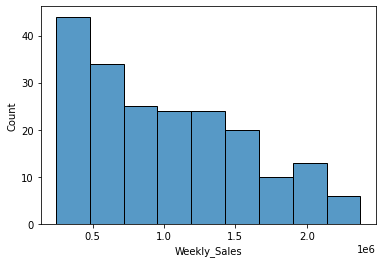

In [ ]:
sns.histplot(y_test)

In [ ]:
y_test.describe()

count    2.000000e+02
mean     1.012339e+06
std      5.483304e+05
min      2.443383e+05
25%      5.436280e+05
50%      9.401596e+05
75%      1.409654e+06
max      2.376022e+06
Name: Weekly_Sales, dtype: float64

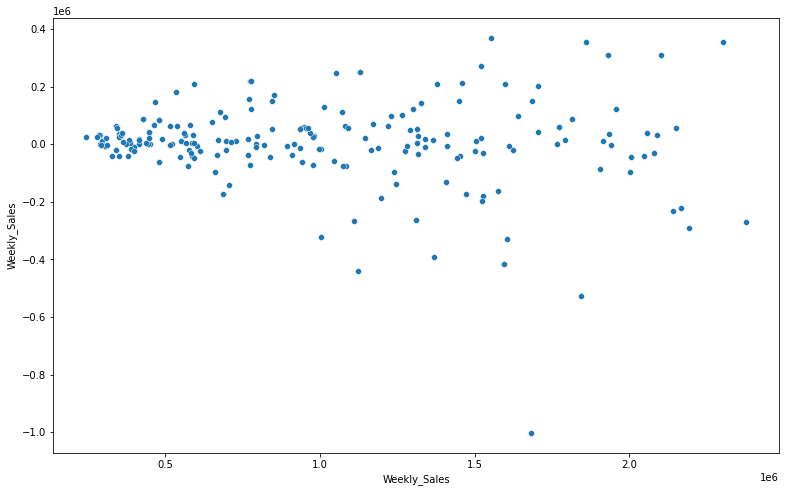

In [ ]:
fig = plt.figure(figsize=(13,8))

sns.scatterplot(x=y_test, y=(Reg_Best.predict(X_test.drop('MarkDown1', axis=1)) - y_test))

plt.show()

In [ ]:
pd.DataFrame({'Variáveis': X_train.drop('MarkDown1', axis=1).columns[1:],
              'VIF': [variance_inflation_factor(X_train.drop('MarkDown1', axis=1).values, i + 1)
                       for i in range(len(X_train.drop('MarkDown1', axis=1).columns[1:]))]})

,Variáveis,VIF
0,store__2,inf
1,store__3,inf
2,store__4,inf
3,store__5,inf
4,store__6,inf
5,store__7,inf
6,store__8,inf
7,store__9,inf
8,store__10,inf
9,store__11,inf


In [ ]:
pred = pd.DataFrame()
pred['Real'] = y_test.reset_index(drop=True)
pred['Predict'] = Reg_Best.predict(X_test.drop('MarkDown1', axis=1).reset_index(drop=True))
pred['Residual'] = pred['Real'] - pred['Predict']

pred

,Real,Predict,Residual
0,892056.64,8.876416e+05,4415.082000
1,601990.02,5.948026e+05,7187.439800
2,1311965.09,1.363749e+06,-51784.137400
3,1070457.80,1.181927e+06,-111469.512333
4,1904438.59,1.816836e+06,87602.350333
...,...,...,...
195,1052609.16,1.299730e+06,-247120.730867
196,1442092.08,1.395089e+06,47003.378600
197,591335.50,5.946663e+05,-3330.810933
198,514993.00,5.777236e+05,-62730.561933
